<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Regresion%20lineal/SRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT - Ensayo

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Generador de datos

##### Codigo Postal

In [2]:
# Cantidad de codigos
n_codigos = 25000

# Define la longitud del código
longitud = 6

# Define los caracteres permitidos para el código alfanumérico
caracteres_permitidos = string.ascii_uppercase + string.digits

# Genera el código alfanumérico aleatorio de longitud 6
codigos = [ ''.join(random.choices(caracteres_permitidos, k=longitud)) for cod in range(n_codigos)]

# Repetir cada valor al menos 30 veces, maximo 40
repetidos = []
for codigo in codigos:
    repetidos.extend([codigo] * max(30, random.randint(1, 40)))

#### Año, Mes y Total

In [3]:
anios = [2020, 2021, 2022]
registros = list()
for anio in anios:   
    for codigo in codigos:
        for m in range(1,13):
            total = random.randint(10,20*int((40+anio*m)/anio))
            registros.append( [codigo, anio, m, total] )  
            

In [4]:
len(registros)

900000

In [5]:
registros[:16]

[['NAD0O3', 2020, 1, 12],
 ['NAD0O3', 2020, 2, 23],
 ['NAD0O3', 2020, 3, 29],
 ['NAD0O3', 2020, 4, 36],
 ['NAD0O3', 2020, 5, 76],
 ['NAD0O3', 2020, 6, 57],
 ['NAD0O3', 2020, 7, 52],
 ['NAD0O3', 2020, 8, 40],
 ['NAD0O3', 2020, 9, 107],
 ['NAD0O3', 2020, 10, 178],
 ['NAD0O3', 2020, 11, 90],
 ['NAD0O3', 2020, 12, 84],
 ['EXUY8T', 2020, 1, 15],
 ['EXUY8T', 2020, 2, 38],
 ['EXUY8T', 2020, 3, 31],
 ['EXUY8T', 2020, 4, 44]]

### Armar Dataframe

In [6]:
df = pd.DataFrame(registros, columns=['codigo','año','mes','total_cp'])

In [7]:
df

,codigo,año,mes,total_cp
0,NAD0O3,2020,1,12
1,NAD0O3,2020,2,23
2,NAD0O3,2020,3,29
3,NAD0O3,2020,4,36
4,NAD0O3,2020,5,76
...,...,...,...,...
899995,3X4QUU,2022,8,68
899996,3X4QUU,2022,9,28
899997,3X4QUU,2022,10,181
899998,3X4QUU,2022,11,138


In [8]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,NAD0O3,2020,1,12
12,EXUY8T,2020,1,15
24,7RA60U,2020,1,20
36,9M3X9H,2020,1,20
48,Z5NQ4N,2020,1,20
...,...,...,...,...
899951,R86BHO,2022,12,113
899963,3C3NQZ,2022,12,205
899975,4W42L2,2022,12,210
899987,WYRC48,2022,12,46


### EDA

### Transformacion

#### LabelEncoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [11]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [12]:
X_encoded.shape

(900000,)

In [13]:
pd.DataFrame(X_encoded)

,0
0,16366
1,16366
2,16366
3,16366
4,16366
...,...
899995,2859
899996,2859
899997,2859
899998,2859


#### Embeddings

In [14]:
tamano_embedding = 10

In [15]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [16]:
matriz_embedding

array([[0.82293605, 0.12626481, 0.89020053, ..., 0.44488658, 0.49443731,
        0.66916832],
       [0.65411998, 0.92099529, 0.43502406, ..., 0.45976677, 0.70094178,
        0.11791564],
       [0.51636851, 0.6954602 , 0.47077218, ..., 0.08821775, 0.26099   ,
        0.0574937 ],
       ...,
       [0.27810707, 0.46081282, 0.84737867, ..., 0.4004277 , 0.33233977,
        0.88985156],
       [0.42149242, 0.80420205, 0.00279903, ..., 0.89779891, 0.56080718,
        0.37240181],
       [0.65050606, 0.81200786, 0.819321  , ..., 0.84829615, 0.34399214,
        0.82252427]])

In [17]:
encoder.classes_

array(['0000D3', '0003H6', '0008TU', ..., 'ZZVJRN', 'ZZWNY7', 'ZZX644'],
      dtype=object)

In [18]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [19]:
atributos_embeddings.shape

(900000, 10)

#### Verificacion embeddings

In [20]:
i = 0
encoder.classes_[i]

'0000D3'

In [21]:
matriz_embedding[i]

array([0.82293605, 0.12626481, 0.89020053, 0.20904056, 0.61463052,
       0.89600791, 0.55584766, 0.44488658, 0.49443731, 0.66916832])

In [22]:
matriz_embedding.shape

(25000, 10)

#### Dataframe con datos de embeddings

In [23]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [24]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168
1,0.654120,0.920995,0.435024,0.360702,0.336438,0.058828,0.685633,0.459767,0.700942,0.117916
2,0.516369,0.695460,0.470772,0.074484,0.621536,0.753292,0.078564,0.088218,0.260990,0.057494
3,0.087418,0.912306,0.756394,0.576773,0.060028,0.137023,0.593265,0.528964,0.933232,0.531728
4,0.417687,0.022057,0.204466,0.094527,0.670127,0.382472,0.689577,0.509026,0.672122,0.261415
...,...,...,...,...,...,...,...,...,...,...
24995,0.362058,0.533202,0.403040,0.827211,0.671061,0.997926,0.677289,0.032064,0.758812,0.600751
24996,0.598923,0.757716,0.125450,0.995698,0.289665,0.098917,0.861532,0.740244,0.910543,0.303364
24997,0.278107,0.460813,0.847379,0.009908,0.148625,0.045806,0.540001,0.400428,0.332340,0.889852
24998,0.421492,0.804202,0.002799,0.597083,0.148671,0.547475,0.176671,0.897799,0.560807,0.372402


In [25]:
embedding_df['codigo'] = encoder.classes_

In [26]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168
0003H6,0.654120,0.920995,0.435024,0.360702,0.336438,0.058828,0.685633,0.459767,0.700942,0.117916
0008TU,0.516369,0.695460,0.470772,0.074484,0.621536,0.753292,0.078564,0.088218,0.260990,0.057494
000XU3,0.087418,0.912306,0.756394,0.576773,0.060028,0.137023,0.593265,0.528964,0.933232,0.531728
003ZVQ,0.417687,0.022057,0.204466,0.094527,0.670127,0.382472,0.689577,0.509026,0.672122,0.261415
...,...,...,...,...,...,...,...,...,...,...
ZZOQHJ,0.362058,0.533202,0.403040,0.827211,0.671061,0.997926,0.677289,0.032064,0.758812,0.600751
ZZT2QA,0.598923,0.757716,0.125450,0.995698,0.289665,0.098917,0.861532,0.740244,0.910543,0.303364
ZZVJRN,0.278107,0.460813,0.847379,0.009908,0.148625,0.045806,0.540001,0.400428,0.332340,0.889852


In [27]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
NAD0O3,2020,1,12
NAD0O3,2020,2,23
NAD0O3,2020,3,29
NAD0O3,2020,4,36
NAD0O3,2020,5,76
...,...,...,...
3X4QUU,2022,8,68
3X4QUU,2022,9,28
3X4QUU,2022,10,181


#### Transformar la variable de salida

In [28]:
mmscaler = MinMaxScaler()

In [29]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [30]:
df.head()

,año,mes,total_cp
codigo,,,
NAD0O3,2020,1,0.008696
NAD0O3,2020,2,0.056522
NAD0O3,2020,3,0.082609
NAD0O3,2020,4,0.113043
NAD0O3,2020,5,0.286957


#### Joins de Dataframes

In [31]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,1,0.030435
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,2,0.130435
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,3,0.169565
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,4,0.113043
0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,5,0.030435
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,8,0.621739
ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,9,0.482609
ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,10,0.769565


#### Datos de entrenamiento

In [32]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,1,0.030435
1,0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,2,0.130435
2,0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,3,0.169565
3,0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,4,0.113043
4,0000D3,0.822936,0.126265,0.890201,0.209041,0.614631,0.896008,0.555848,0.444887,0.494437,0.669168,2020,5,0.030435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,8,0.621739
899996,ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,9,0.482609
899997,ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,10,0.769565
899998,ZZX644,0.650506,0.812008,0.819321,0.383652,0.918668,0.219802,0.915307,0.848296,0.343992,0.822524,2022,11,0.800000


In [33]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [34]:
X_data.shape

(900000, 12)

In [35]:
y_data = df_final['total_cp'].to_numpy()

In [36]:
y_data

array([0.03043478, 0.13043478, 0.16956522, ..., 0.76956522, 0.8       ,
       0.88695652])

In [37]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [38]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [39]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

##### RMSE

In [40]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [42]:
mse_train, mse_test

(0.03057184326825373, 0.03066167712140475)

In [41]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.1748 0.1751


##### R2 Score

In [43]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.42488


0.3 - 0.5 (malo)

### Prediccion

In [44]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [67]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [68]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [69]:
atributos_in = atributos_in.reshape(1, 12)

In [70]:
pred = modelo.predict(atributos_in)

In [71]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0],2)*100} incidentes")

Prediccion para el código 1W3LDQ Año 2023 Mes 6: 24.0 incidentes


### Verificacion grafica

In [72]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
50112,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,1,0.013043
50113,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,2,0.121739
50114,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,3,0.152174
50115,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,4,0.200000
50116,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,5,0.321739
50117,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,6,0.091304
50118,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,7,0.039130
50119,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,8,0.539130
50120,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,9,0.617391
50121,1W3LDQ,0.847275,0.477348,0.863057,0.820751,0.311732,0.068554,0.244815,0.144215,0.482788,0.809703,2020,10,0.678261


In [73]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [74]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13]*100)

In [75]:
fechas[0]

'2020-1-01'

In [76]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales})

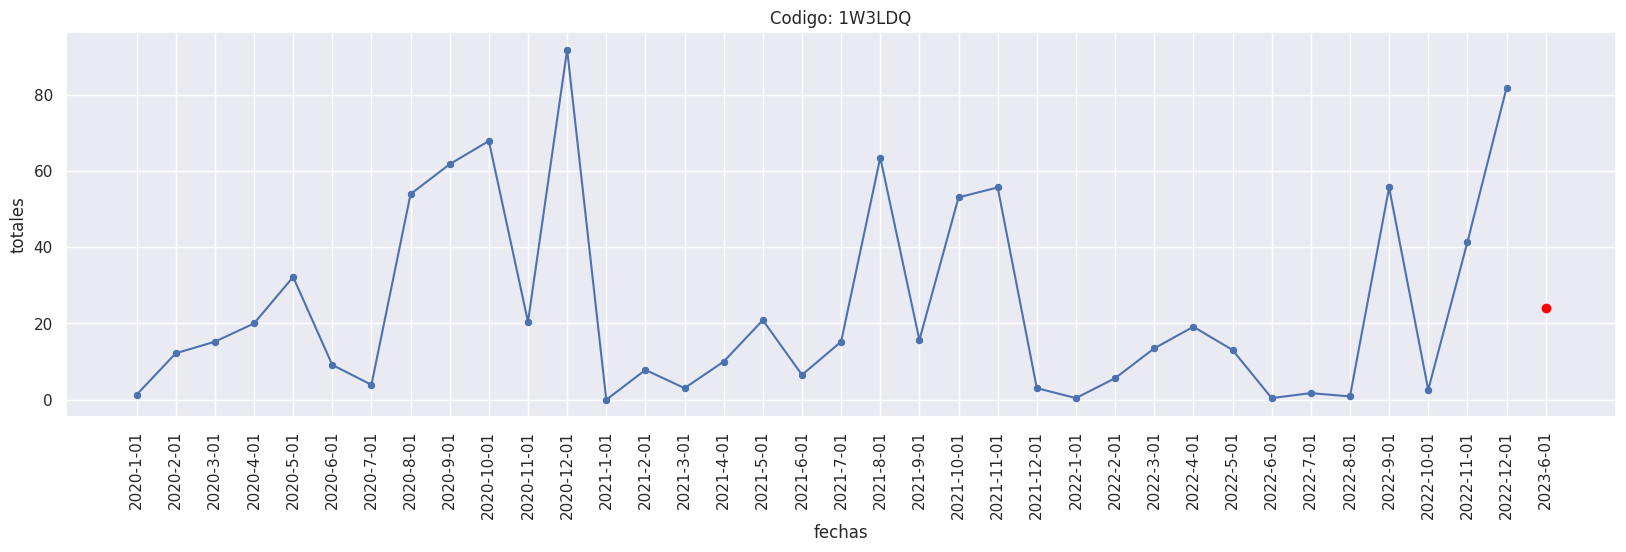

In [77]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred*100, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()